# Contoh Implementasi Algoritma Regresi Linear

Berikut adalah langkah-langkah sederhana yang dilakukan dalam membangun suatu model regresi dan kemudian memprakirakan suatu nilai baru berdasarkan model yang telah dibangun.

Sebagai pengingat, bahwa model yang dibentuk oleh regresi adalah suatu persamaan fungsi, dan fungsi yang dibentuk oleh regresi linear adalah fungsi linear.

Pada program ini, modul pembelajaran mesin yang dipakai adalah `scikit-learn` (yang dipanggil dengan nama `sklearn`), yang memiliki fungsi-fungsi untuk pembelajaran mesin sederhana, seperti regresi linear, SVM (*Support Vector Machine*), dan KNN (*k-Nearest Neighbor*).

Selain `scikit-learn`, juga terdapat modul lain untuk menunjang kinerja program seperti `numpy` untuk pemrosesan larik (array) dan `pandas` untuk analisis data, `matplotlib` untuk penampilan, dan `kagglehub` untuk mengunduh dataset dar Kaggle, salah satu platform pembelajaran mesin terpopuler.

**Hal yang dituliskan pertama kali dalam sebuah program Python adalah pemuatan modul yang diperlukan**

In [32]:
# Memuat modul (library) yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import kagglehub

**Kemudian, data masukan perlu didefinisikan**. Untuk mendefinsikan data masukan, dapat dilakukan baik secara manual maupun mengunduh data yang telah disiapkan.
**Kode di bawah mengunduh data dari Kaggle dengan `kagglehub` API**, yang kemudian diubah menjadi suatu objek bertipe `DataFrame` yang disediakan oleh `Pandas`.

Dataset sumber dapat dilihat di [sini](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset).

**Data (kolom) yang diperlukan akan diekstrak** dari objek `DataFrame` tersebut.

In [33]:
# Mengunduh dataset dar Kaggle
path = kagglehub.dataset_download("rabieelkharoua/students-performance-dataset", path="Student_performance_data _.csv")

# Lepas tanda pagar pada garis di bawah jika ingin melihat lokasi penyimpanan dataset
#print("Path to dataset files:", path)

#Memuat file hasil unduhan menjadi objek DataFrame oleh Pandas
inputData = pd.read_csv(path)

x = inputData[["Absences"]].to_numpy()
y = inputData["GPA"].to_numpy()

Untuk melihat data masukan yang akan diproses, **nama variabel yang berisi data tersebut dapat ditulis secara langsung** dalam sebuah cell kode di sebuah Jupyter Notebook (file berekstensi `.ipynb` yang saat ini dilihat)

In [34]:
# Melihat sekilas nilai x
x

array([[ 7],
       [ 0],
       [26],
       ...,
       [20],
       [17],
       [13]])

In [35]:
# Melihat sekilas nilai y
y

array([2.92919559, 3.04291483, 0.11260225, ..., 1.14233288, 1.80329676,
       2.14001388])



---



Untuk membangun suatu model yang baik, data masukan harus dipisah menjadi data pelatihan (*training*) dan pengujian (*testing*). Hal ini dilakukan agar model yang dibentuk oleh data pelatihan dapat diuji oleh data pengujian yang terpisah dari data pelatihan.

(*Untuk algoritma dan data yang lebih kompleks, pengkhususan data untuk validasi akan sangat membantu proses pelatihan*)

In [37]:
# Memisahkan data untuk pelatihan dan pengujian
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Untuk membangun sebuah model regrasi linear dengan `scikit-learn` (atau `sklearn`), sebuah variabel **model didefinisikan dengan fungsi `LinearRegression()`** dari submodul `sklearn.linear_model`
Hal yang dilakukan setelsh itu adalah **memasangkan (*fit*) model kepada data masukan** yang telah didefinisikan.

In [38]:
# Membuat sebuah model Linear Regresi
model = LinearRegression()
# Memasangkan model kepada data masukan
model.fit(x_train, y_train)

LinearRegression()

Setelah mendapatkan model dari data masukan, maka nilai-nilai pada fungsi regresi seperti intercept (nilai hasil yang bersinggungan dengan nilai nol pada variabel independen) dan koefisien (nilai pengali untuk variabel-variabel independen) dapat ditampilkan.

In [43]:
# Manampilkan data koefisien dan intercept
print("Nilai koefisien [StudyTimeWeekly, Absences]:", model.coef_[0])
print("Nilai intercept [GPA]:", model.intercept_)

Nilai koefisien [StudyTimeWeekly, Absences]: -0.09995530270735295
Nilai intercept [GPA]: 3.3528218259761164




---



Kemudian, untuk menguji sebuah model, hal yang dilakukan adalah memasukkan nilai pengujian untuk variabel independen, dan mengamati hasil prediksi dari data yang dimasukkan tersebut dan membandingkannya dengan nilai yang dimiliki.

In [51]:
comparison = pd.DataFrame({'Absences': x_test[:, 0], 'GPA': y_test, 'Prediction': model.predict(x_test)})
comparison

,Absences,GPA,Prediction
0,5,2.224197,2.853045
1,12,2.745859,2.153358
2,29,0.912416,0.454118
3,17,1.482596,1.653582
4,3,2.913888,3.052956
...,...,...,...
474,23,1.668925,1.053850
475,23,0.893986,1.053850
476,5,2.332540,2.853045
477,13,2.334526,2.053403


In [40]:
# Memprediksi nilai hasil (y) baru dari sepasang nilai baru untuk variabel independen
x_baru = np.array([int(input("Masukkan data banyak ketidakhadiran (Absences)\t:"))]).reshape(-1, 1)
y_baru = model.predict(x_baru)
print("Prediction:", y_baru)

Masukkan data banyak ketidakhadiran (Absences)	:4
Prediction: [2.95300062]




---



Untuk mempermudah visualisasi, maka data pengujian dan prakiraan hasil dapat ditampilkan dalam sebuah grafik dengan menggunakan modul `matplotlib`.

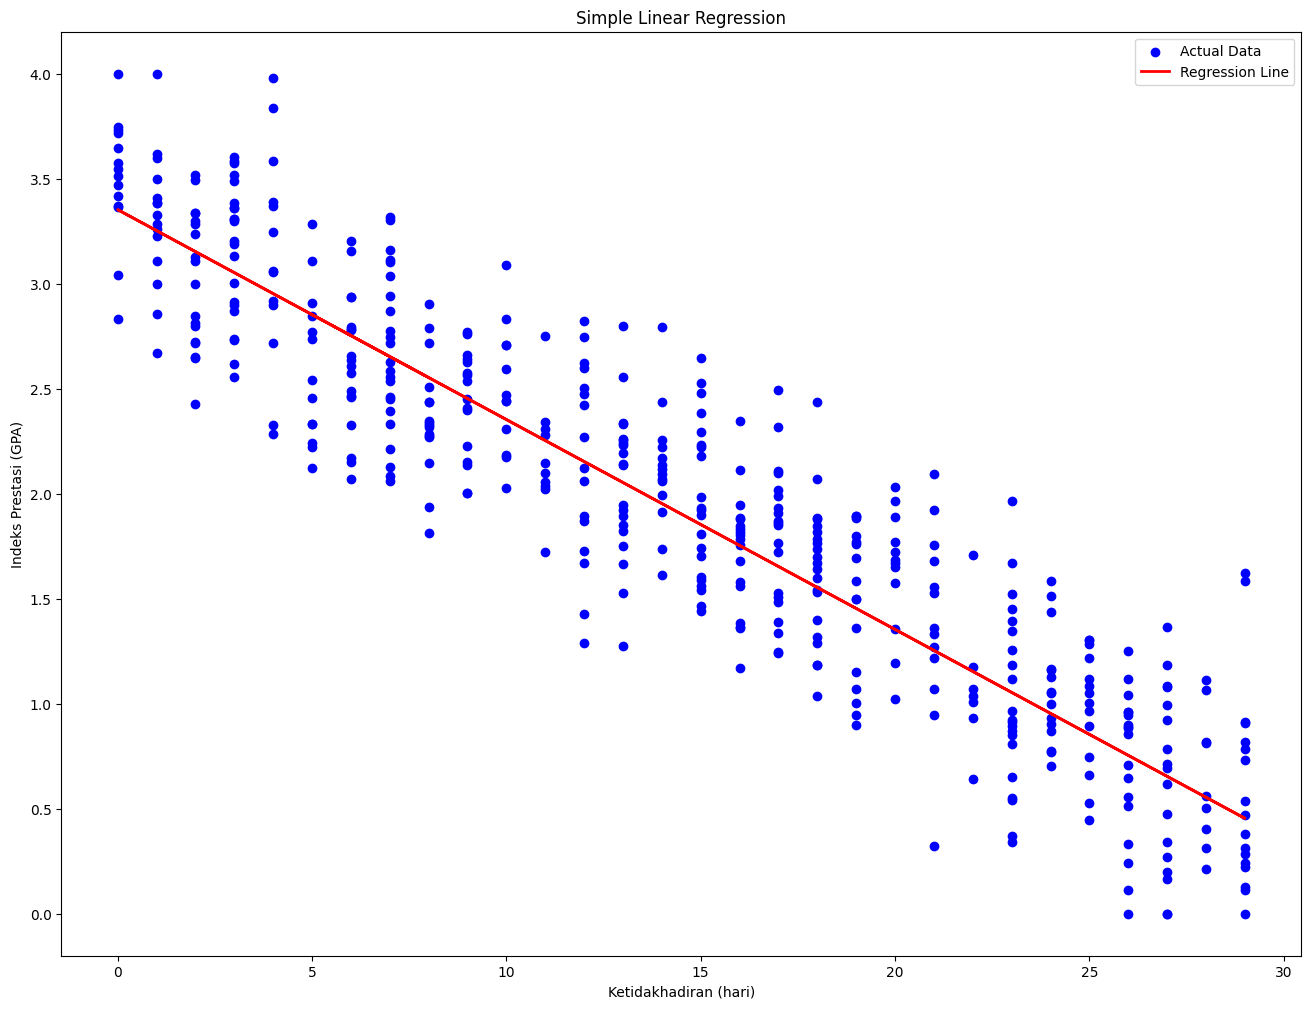

In [52]:
# Visualize the data and the regression line
y_pred = model.predict(x_test)
plt.figure(figsize=(16, 12))
plt.scatter(x_test, y_test, color='blue', label='Actual Data')  # Scatter plot of data points
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Regression Line')  # Line plot of the regression line
plt.xlabel('Ketidakhadiran (hari)')
plt.ylabel('Indeks Prestasi (GPA)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

# Setelah mendapatkan hasil berupa model dan prediksi, maka yang harus dilakukan adalah menyimpulkan hasil yang didapat tersebut, sesuai dengan konteks data yang dimasukkan.

Untuk kesimpulan, kalian harus membuatnya sendiri